In [1]:
using Pkg
# Pkg.activate("C:\\Users\\zachl\\OneDrive\\Documents\\GitHub\\StateSpaceDynamics.jl")
# Pkg.instantiate()

using LinearAlgebra
using Plots
using Distributions
using Random
using SSM
using StatsBase

In [2]:
Random.seed!(1234)

# Define gaussian emission models
output_dim = 2
n=1000
μ = [0.0, 0.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_1 = Gaussian(output_dim=output_dim, μ=μ, Σ=Σ)

μ = [2.0, 1.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_2 = Gaussian(μ=μ, Σ=Σ, output_dim=output_dim)

μ = [-1.0, 2.0]
Σ = 0.1 * Matrix{Float64}(I, output_dim, output_dim)

emission_3 = Gaussian(μ=μ, Σ=Σ, output_dim=output_dim)

# make the true_model
true_model = HiddenMarkovModel(K=3, B=[emission_1, emission_2, emission_3])
true_model.πₖ = [0.8, 0.1, 0.1]
true_model.A = [0.9 0.05 0.05; 0.05 0.9 0.05; 0.05 0.05 0.9]

# generate some data
state_sequence, Y = SSM.sample(true_model, n=n)



([2, 3, 3, 1, 1, 3, 3, 3, 3, 3  …  1, 1, 1, 1, 1, 2, 2, 2, 2, 2], [2.1328938262086075 0.7831718223504733; -0.8972598979718889 1.9035817572135025; … ; 1.9678313267049008 1.0944439892842264; 2.183978111318614 1.5011344418537047])

In [3]:
"""
Wrapper Demonstrations
"""
model = SSM.GaussianHMM(K=2, output_dim=5)
model2 = SSM.SwitchingGaussianRegression(K=2, input_dim=5, output_dim=10)
model3 = SSM.SwitchingBernoulliRegression(K=2, input_dim=5)
model4 = SSM.SwitchingAutoRegression(K=2, output_dim=5, order=2)

HiddenMarkovModel([0.5414383768816605 0.4585616231183394; 0.8594694008834669 0.1405305991165331], EmissionModel[SSM.AutoRegressionEmission(AutoRegression(5, 2, GaussianRegression(10, 5, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], true, 0.0))), SSM.AutoRegressionEmission(AutoRegression(5, 2, GaussianRegression(10, 5, [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], true, 0.0)))], [0.6967429734473319, 0.303257026552668], 2)

In [2]:
# generate data from a Gaussian HMM model
Random.seed!(1234)

A = [0.7 0.2 0.1; 0.1 0.7 0.2; 0.2 0.1 0.7]
    means = [[0.0, 0.0], [-1.0, 2.0], [3.0, 2.5]]
    covs = [
                [0.1 0.0; 0.0 0.1],  # Covariance matrix for state 1
                [0.1 0.0; 0.0 0.1],  # Covariance matrix for state 2
                [0.1 0.0; 0.0 0.1]   # Covariance matrix for state 3
            ]
emissions_models = [GaussianEmission(mean, cov) for (mean, cov) in zip(means, covs)]
simul_hmm = GaussianHMM(A, emissions_models, [0.33, 0.33, 0.34], 3, 2)
states, observations = SSM.sample(simul_hmm, 10000)


model = GaussianHMM(observations, 3)
# baumWelch!(model, observations, 100)

-17663.160711472912
-13271.67519963756
-13271.666650993717
-13271.666647170097
-13271.666647168035


In [3]:
α = SSM.forward(model, observations)
β = SSM.backward(model, observations)
γ = SSM.calculate_γ(model, α, β)
ξ = SSM.calculate_ξ(model, α, β, observations)


9999×3×3 Array{Float64, 3}:
[:, :, 1] =
  -18.7504       -362.451   -173.329
  -96.8866       -158.591    -80.7281
 -153.959         -76.3804  -158.012
  -76.3804          0.0      -72.7632
   -1.81899e-12   -78.6818   -32.2671
  -86.8892       -179.274   -116.952
 -174.569         -90.8293  -180.347
 -173.536         -85.856   -177.875
 -145.639         -62.9325  -148.888
 -132.603         -72.8197  -144.304
    ⋮                       
  -71.0093          0.0      -74.1317
    0.0           -71.2519   -32.0565
    0.0           -85.6724   -31.5123
   -2.00089e-11   -80.6842   -33.2658
  -69.437        -143.312    -96.682
  -69.437           0.0      -65.1618
   -5.63887e-11   -66.5321   -35.1838
   -6.73026e-11   -69.2317   -23.5849
   -1.09139e-11   -74.5357   -25.2551

[:, :, 2] =
  -77.3053       -417.856   -229.292
  -18.7504        -77.3053    -7.19047e-9
  -80.7281          0.0      -82.1891
 -158.212         -78.6818  -152.003
  -89.2352       -164.767   -118.91
   -1.81899e-1

In [14]:
sum(exp.(ξ), dims=(2, 3))

9999×1×1 Array{Float64, 3}:
[:, :, 1] =
 1.000000000000517
 1.000000000000517
 1.0
 1.0000000000000098
 0.9999999999993645
 0.9999999999993548
 1.0
 1.0
 1.0
 1.0
 ⋮
 1.000000000000012
 1.0000000000000326
 1.0000000000000242
 0.9999999999996417
 0.9999999999996382
 1.0000000000000004
 1.0000000000007891
 1.000000000000636
 0.999999999999851

In [4]:
model.A

3×3 Matrix{Float64}:
 2886.0     0.0  2803.0
 1507.0     0.0     0.0
 1296.0  1507.0     0.0

In [4]:
alpha = SSM.forward(model, observations)
beta = SSM.backward(model, observations)
xi = SSM.calculate_ξ(model, alpha, beta, observations)

3×3×9999 Array{Float64, 3}:
[:, :, 1] =
 -18.1153   -0.00573578  -20.788
 -49.9552  -31.5774      -54.1222
 -22.1886   -5.1639      -23.7835

[:, :, 2] =
 -157.289  -101.658   -18.0984
 -137.697   -81.7967   -1.47884e-8
 -161.008  -106.461   -20.7392

[:, :, 3] =
 -270.359  -206.053   -137.697
 -212.964  -148.391    -81.7967
 -133.74    -70.5192     0.0

;;; … 

[:, :, 9997] =
  -0.072292  -20.5265   -4.41383
 -33.8265    -54.0125  -39.6622
  -2.89121   -24.4302   -6.15482

[:, :, 9998] =
  -0.0197633  -22.5551   -5.23303
 -20.5078     -42.7748  -27.2152
  -4.26813    -27.8882   -8.40347

[:, :, 9999] =
  -0.0167598  -32.5151   -4.50453
 -22.5528     -54.7828  -28.5348
  -5.22442    -38.8075   -8.63426

In [7]:
sum(exp.(xi[:, :, 1]))

0.9999999999992296

In [16]:
using DataFrames
using CSV
CSV.write("hmm_observations.csv", DataFrame(observations, :auto), writeheader=false)

"hmm_observations.csv"

In [3]:
using CSV
using DataFrames

# import old faithful data
old_faithful = CSV.read("/Users/ryansenne/PycharmProjects/NV_States_GLM_HMM/HMM_Bishop/faithful.csv", DataFrame)

# set up a variable for the HMM
X = Matrix{Float64}(old_faithful[:, [:waiting, :eruptions]])
#  zscore the data
X = (X .- mean(X, dims=1)) ./ std(X, dims=1)

# Set up initial parameters
A = [0.2 0.8; 0.5 0.5];
Pi = [0.5, 0.5];

U1 = [3, -5];
U2 = [-3, -3];
Sigma1 = [1 0; 0 1];
Sigma2 = [0.5 0; 0 0.5];

hmm = SSM.GaussianHMM(A, [GaussianEmission(U1, Sigma1), GaussianEmission(U2, Sigma2)], Pi, 2, 2)
# hmm = SSM.GaussianHMM(X, 2)
baumWelch!(hmm, X, 11, 1e-3)


-4584.5258332169415
-386.3132837521509
-370.538737764364
-361.912908169515
-357.8273503052301
-353.49494957458353
-350.7938428520957
-350.33259560079733
-350.3002596397879
-350.2990049814304
-350.29896245266696


In [15]:
hmm.A

2×2 Matrix{Float64}:
 0.476748  0.523252
 0.938164  0.0618363

In [8]:
SSM.loglikelihood(hmm.B[2], X[2, :])

-6.546418900933308

In [11]:
SSM.backward(hmm, X)'

272×2 adjoint(::Matrix{Float64}) with eltype Float64:
 -4566.11    -4566.58
 -4560.09    -4559.34
 -4541.2     -4541.67
 -4531.47    -4530.55
 -4508.6     -4509.07
 -4498.69    -4497.77
 -4475.35    -4474.44
 -4456.98    -4457.45
 -4451.44    -4450.52
 -4429.5     -4429.97
     ⋮       
  -117.004    -117.474
  -111.44     -111.909
  -102.426    -101.569
   -76.7781    -75.8624
   -55.3766    -55.8466
   -50.2179    -49.3016
   -28.5968    -29.0668
   -24.3439    -23.5034
     0.0         0.0

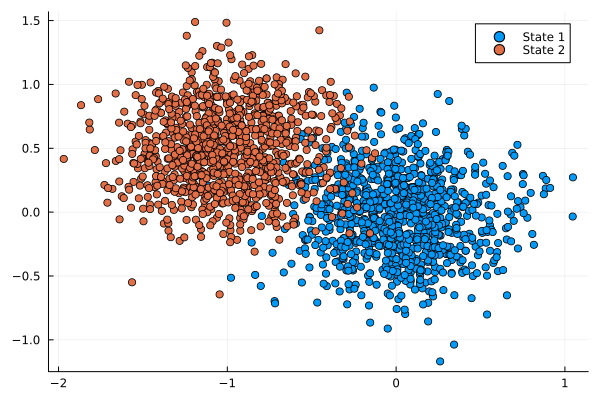

In [7]:
# let's make a synthetic model, and then try to fit it
A = [[0.9 0.1]; [0.25 0.75]]

means=[[0.0, 0.0], [-1.0, 0.5]]
covs = [
    [0.1 0.0; 0.0 0.1],  # Covariance matrix for state 1
    [0.1 0.0; 0.0 0.1]   # Covariance matrix for state 2
]

pdf_1 = MvNormal(means[1], covs[1])
pdf_2 = MvNormal(means[2], covs[2])

sample_1 = rand(pdf_1, 1000)
sample_2 = rand(pdf_2, 1000)

scatter(sample_1[1, :], sample_1[2, :], label="State 1")
scatter!(sample_2[1, :], sample_2[2, :], label="State 2")

In [12]:
toy_hmm = GaussianHMM(A, [GaussianEmission(means[1], covs[1]), GaussianEmission(means[2], covs[2])], [0.9, 0.1], 2, 2)

states, data = SSM.sample(toy_hmm, 1000)

([2, 2, 2, 1, 1, 1, 1, 1, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [-0.8297620365459278 0.5917954279068479; -0.20533127840249887 0.26741388345128625; … ; 0.03097413492620563 -0.2894011433913984; -0.016945393739268975 0.010585257389440175])

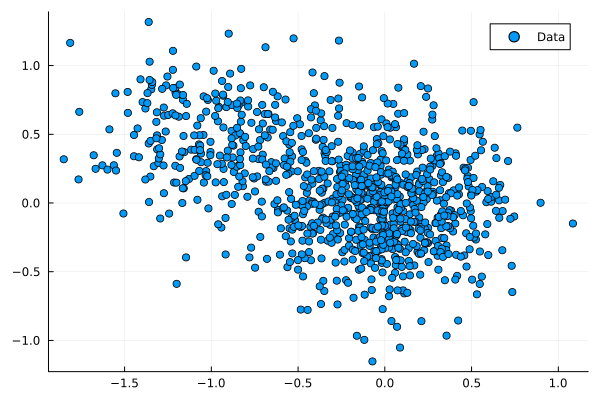

In [16]:
scatter(data[:, 1], data[:, 2], label="Data")

In [18]:
real_hmm = GaussianHMM(data, 2)
baumWelch!(real_hmm, data, 100)

-1205.0105565688134
-1140.1384695164884
-1123.278944617412
-1110.2676713263274
-1096.8918326798287
-1081.3444530508993
-1062.819245709462
-1041.4381948321256
-1018.0463972360346
-993.640858128495
-969.8709437783067
-949.1539842677385
-932.8895362195647
-920.7056188607182
-911.9625239914351
-906.020382899077
-902.2384115123003
-900.0648906501476
-898.9797247053924
-898.5253066644816
-898.363726400594
-898.3121590572729
-898.2966114615788
-898.2920472737882
-898.2907232353392
-898.2903411158261
-898.2902310760792
-898.2901994160653
-898.2901903101699
-898.2901876915282
-898.2901869384697


In [22]:
real_hmm.πₖ

2-element Vector{Float64}:
 1.0
 1.2785724731445115e-83

In [3]:
A

3×2 Matrix{Float64}:
 0.325977  0.894245
 0.549051  0.353112
 0.218587  0.394255

In [3]:
using Random
Random.seed!(1234)
A = rand(3, 2)

SSM.interleave_reshape(A, 3, 2)

Matrix{Float64} (alias for Array{Float64, 2})